In [1]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
plt.style.use('default')

In [2]:
weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

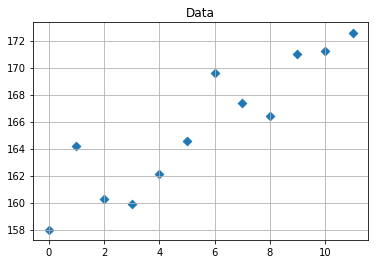

In [3]:
x_values = np.arange(0, len(weights))
x0_values = np.arange(-1, len(weights))
plt.scatter(x_values, weights, marker='D')
plt.title('Data')
plt.grid(True)
plt.show()

In [4]:
def predict_on_gain(weights, start_weight, gain_rate, scale_factor, time_step):
    predictions = []
    estimations = [start_weight]
    weight = start_weight
    for z in weights:
        prediction = weight + gain_rate*time_step
        estimation = prediction + scale_factor*(z - prediction)
        weight = estimation
        
        predictions.append(prediction)
        estimations.append(estimation)
    return estimations, predictions

In [5]:
estimations, predictions = predict_on_gain(
    weights,
    start_weight=160,
    gain_rate=1,
    scale_factor=4/10,
    time_step=1
)

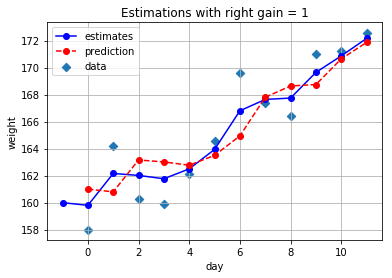

In [6]:
plt.scatter(x_values, weights, marker='D')
plt.plot(x0_values, estimations, 'bo-')
plt.plot(x_values, predictions, 'ro--')
plt.legend(['estimates', 'prediction', 'data'])
plt.grid(True)
plt.xlabel('day')
plt.ylabel('weight')
plt.title('Estimations with right gain = 1')
plt.show()

In [7]:
estimations, predictions = predict_on_gain(
    weights,
    start_weight=160,
    gain_rate=-1,
    scale_factor=4/10,
    time_step=1
)

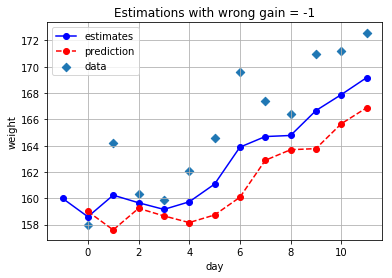

In [8]:
plt.scatter(x_values, weights, marker='D')
plt.plot(x0_values, estimations, 'bo-')
plt.plot(x_values, predictions, 'ro--')
plt.legend(['estimates', 'prediction', 'data'])
plt.grid(True)
plt.xlabel('day')
plt.ylabel('weight')
plt.title('Estimations with wrong gain = -1')
plt.show()

In [9]:
def predict_on_gain_scale(weights, start_weight, gain_rate, gain_scale, scale_factor, time_step):
    predictions = []
    estimations = [start_weight]
    weight = start_weight
    for z in weights:
        prediction = weight + gain_rate*time_step
        
        residual = z - prediction
        
        gain_rate = gain_rate + gain_scale*(residual / time_step)
        
        estimation = prediction + scale_factor*residual
        weight = estimation
        
        predictions.append(prediction)
        estimations.append(estimation)
    return estimations, predictions

In [10]:
estimations, predictions = predict_on_gain_scale(
    weights,
    start_weight=160,
    gain_rate=-1,
    gain_scale=1/3,
    scale_factor=4/10,
    time_step=1
)

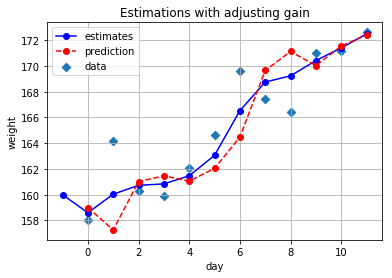

In [11]:
plt.scatter(x_values, weights, marker='D')
plt.plot(x0_values, estimations, 'bo-')
plt.plot(x_values, predictions, 'ro--')
plt.legend(['estimates', 'prediction', 'data'])
plt.grid(True)
plt.xlabel('day')
plt.ylabel('weight')
plt.title('Estimations with adjusting gain')
plt.show()

In [19]:
def g_h_filter(data, x0, dx, g, h, dt):
    #p = []
    e = [x0]
    x = x0
    for z in data:
        # prediction phase
        cp = x + dx*dt
        dx = dx # will change soon
        
        # update phase (estimation)
        r = z - cp
        dx = dx + g*(r / dt)
        ce = cp + h*r
        x = ce
        
        # append results
        #p.append(cp)
        e.append(ce)
    return e #, p

In [22]:
weights_est = g_h_filter(weights, x0=160, dx=-1, g=6/10, h=2/3, dt=1)

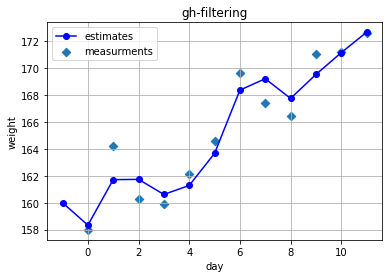

In [23]:
plt.scatter(x_values, weights, marker='D')
plt.plot(x0_values, weights_est, 'bo-')
plt.legend(['estimates', 'measurments'])
plt.grid(True)
plt.xlabel('day')
plt.ylabel('weight')
plt.title('gh-filtering')
plt.show()

In [24]:
def noisy_data(x0, dx, count, noise_factor):
    return [x0 + dx*i + np.random.randn()*noise_factor for i in range(count)]

In [79]:
measurments = noisy_data(5, 2, 100, 100)

In [80]:
m_est = g_h_filter(measurments, 100, 3.3, .02, .2, 1)

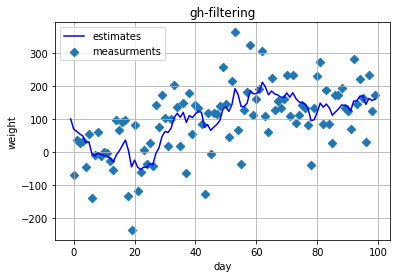

In [81]:
plt.scatter(np.arange(0, len(measurments)), measurments, marker='D')
plt.plot(np.arange(-1, len(measurments)), m_est, 'b-')
plt.legend(['estimates', 'measurments'])
plt.grid(True)
plt.xlabel('day')
plt.ylabel('weight')
plt.title('gh-filtering')
plt.show()